<a href="https://colab.research.google.com/github/yeyomuri/probabilidad/blob/main/estimacion_parametrica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal

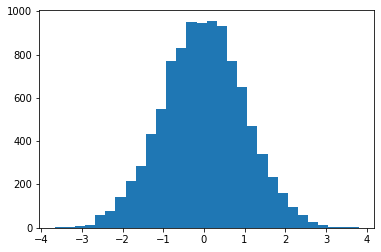

In [10]:
sample = normal(size = 10000) #Datos aleatorios de una distribucion normal 
plt.hist(sample, bins = 30)
plt.show()

##Estimación paramétrica

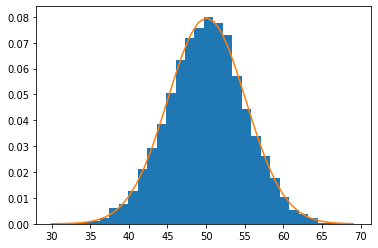

In [15]:
sample = normal(loc = 50, scale = 5, size = 10000)#promedio, sigma, numero de datos
mu = sample.mean()
sigma = sample.std()
dist = norm(mu, sigma)
values = [value for value in range(30, 70)]
probabilidades = [dist.pdf(value) for value in values]
plt.hist(sample, bins = 30, density = True)
plt.plot(values, probabilidades)
plt.show()

#Estimación no paramétrica

    Kernel, Density estimation


*   [parametro suavizado]: smoothing paramater
*   [función base]: basis function

Kernel density estimation en [scipy](https://scikit-learn.org/stable/modules/density.html)



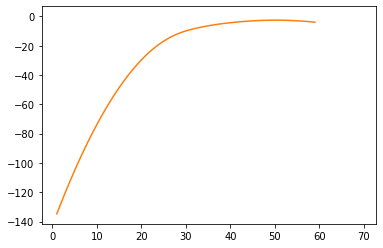

In [20]:
from numpy import hstack
from sklearn.neighbors import KernelDensity

#Construimos una distribucion bimodal

sample1 = normal(loc = 20, scale = 5, size = 300)
sample2 = normal(loc = 40, scale = 5, size = 700)
sample3 = hstack((sample1, sample2))

model = KernelDensity(bandwidth = 2, kernel = 'gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)

values = np.asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values) #probabilidad logaritmica
probabilidad = np.exp(probabilities) #inversion de probabilidad
plt.hist(sample, bins = 50, density = True)
plt.plot(values, probabilities)
plt.show()